In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

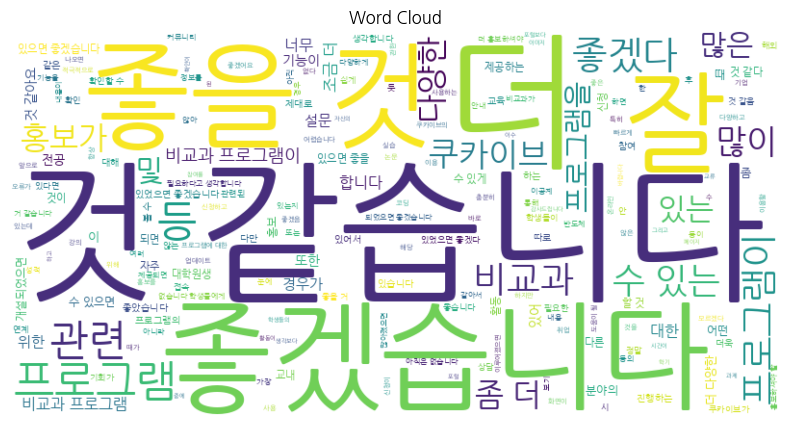

In [ ]:
file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')

text = ' '.join(data.stack().astype(str))

wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
!pip install konlpy
!apt-get install -y openjdk-8-jdk
!pip install JPype1-py3
!pip install mecab-python3
!apt-get install -y curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
  mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


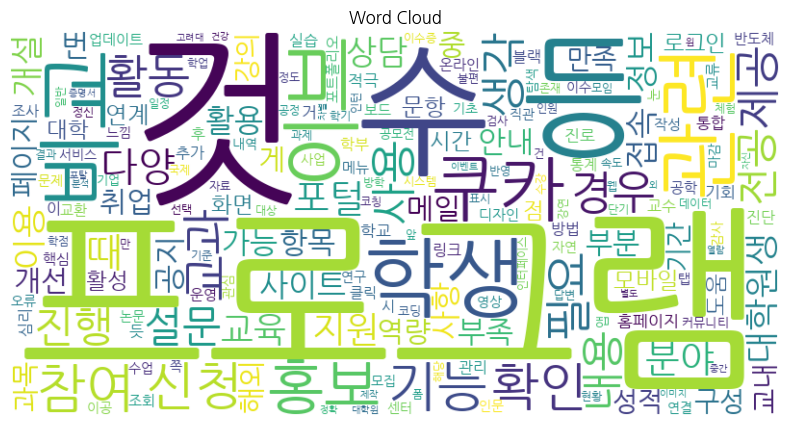

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from collections import Counter


!apt-get update -qq
!apt-get install fonts-nanum* -qq


import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')


file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')


text = ' '.join(data.stack().astype(str))


mecab = Mecab()


nouns = mecab.nouns(text)


noun_counts = Counter(nouns)


wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(noun_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Mecab

file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')


text = ' '.join(data.stack().astype(str))

mecab = Mecab()

nouns = mecab.nouns(text)

noun_counts = Counter(nouns)

freq_df = pd.DataFrame(noun_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
freq_df

,Word,Frequency
13,프로그램,143
68,것,129
51,수,63
18,등,54
33,학생,49
...,...,...
442,공대,1
438,일부,1
435,설계,1
434,회로,1


In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Mecab

file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')


text = ' '.join(data.stack().astype(str))


mecab = Mecab()


nouns = mecab.nouns(text)


stopwords = set(['것', '수', '이', '그', '저', '있', '하', '등', '들', '의', '에', '를', '은', '는', '을', '가', '와', '과', '로', '에서', '까지', '하다'])


filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]


noun_counts = Counter(filtered_nouns)


freq_df = pd.DataFrame(noun_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)


freq_df

,Word,Frequency
12,프로그램,143
30,학생,49
46,비교,48
72,관련,46
20,이브,44
...,...,...
113,토론,1
429,소프트,1
428,마이크,1
427,구글,1


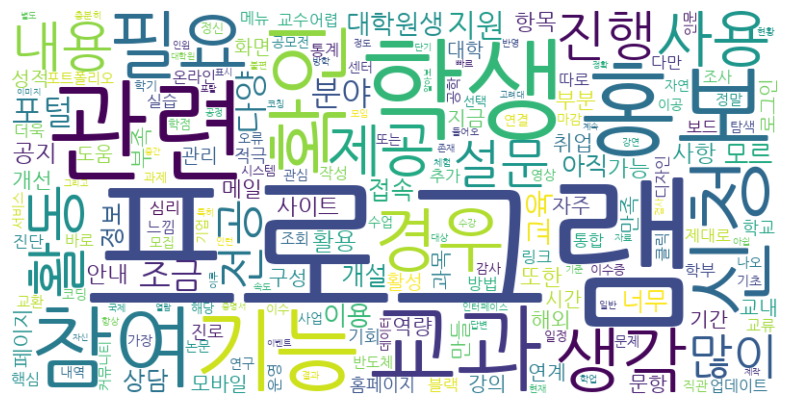

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')

text = ' '.join(data.stack().astype(str))


text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)
mecab = Mecab()
words = mecab.pos(text)
selected_words = [word for word, pos in words if pos in ['NNG', 'NNP', 'VV', 'VA', 'MAG', 'MAJ']]


stopwords = set(['쿠카','이브', '비교'])
'''
'것', '수', '이', '그', '저', '있', '하', '등', '들', '의', '에', '를', '은', '을', '가', '와', '로', '에서', '까지', '하다',
'''

filtered_words = [word for word in selected_words if word not in stopwords and len(word) > 1]


word_counts = Counter(filtered_words)


freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# 빈도수 출력
#print(freq_df.head(20))


wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud')
plt.show()


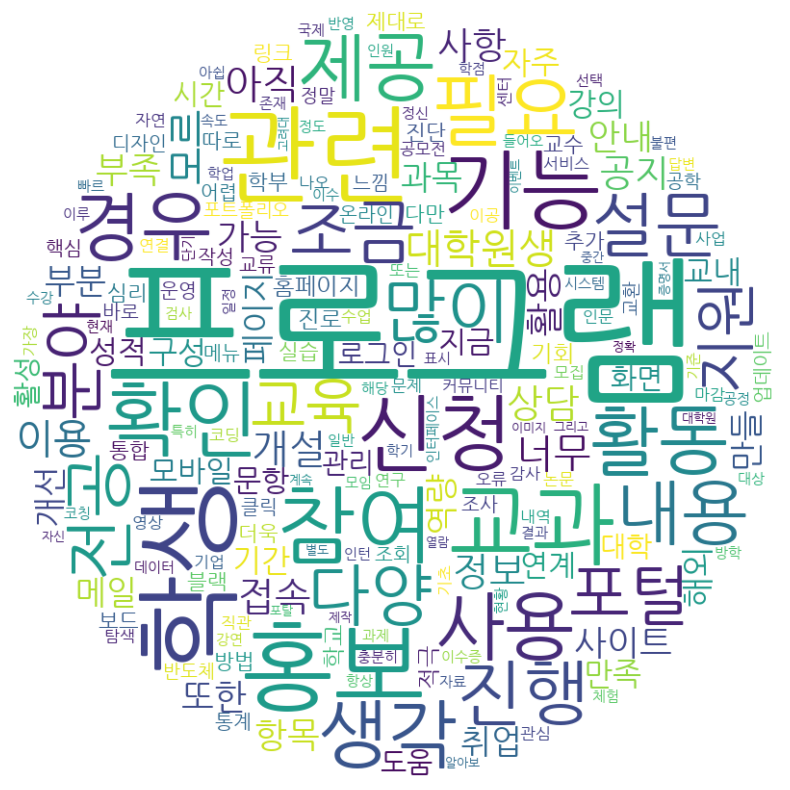

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

file_path = 'Satisfaction Survey Results Text.csv'
data = pd.read_csv(file_path, encoding='utf-8-sig')


text = ' '.join(data.stack().astype(str))


text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)

mecab = Mecab()


words = mecab.pos(text)
selected_words = [word for word, pos in words if pos in ['NNG', 'NNP', 'VV', 'VA', 'MAG', 'MAJ']]


stopwords = set(['쿠카', '이브', '비교'])


filtered_words = [word for word in selected_words if word not in stopwords and len(word) > 1]


word_counts = Counter(filtered_words)


freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)


x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)


wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color='white', mask=mask).generate_from_frequencies(dict(word_counts))


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
